<a href="https://colab.research.google.com/github/Precillieo/Plotly-Tutorial-For-Beginners/blob/main/Plotly_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PLOTLY LIBRARY
 Plotly is a Python graphing library. It makes exotic,  interactive, publication-quality graphs online. 

* Importation of libraries and data loading
* Different Types of Charts
  * Line Chart
  * Scatter Chart
  * Bar Chart
  * Pie Chart
  * Bubble Chart
  * Histogram
  * WordCloud
  * Box Plot
  * Scatter Matrix Plot

    


In [1]:
pip install plotly   

In [2]:
import pandas as pd
import numpy as np
from plotly.offline import init_notebook_mode, iplot, plot 
import plotly as py
init_notebook_mode(connected= True)
import plotly.graph_objs as go 

from wordcloud import WordCloud

import matplotlib.pyplot as plt

* Plotly was designed to render graphs on a web server or a local port. In order to render the plots inside the jupyter notebook, the notebook mode of plotly must be initialized. Without initializing notebook mode, no plotly plots can be visualized within this notebook (or any jupyter notebook).

* To start creating graphs using plotly, we need to import 'graph_objs' modules

* iplot() plots the figure(fig) that is created by data and layout

# 3 Parts To Every Graph
* Data or Trace: This is usually a Python list object and contains all the data that we would want to plot. A trace is a collection of data points and their specifications that we would want to plot.

* Layout: This object is used to change the features of the graph like axis titles, spacing, fonts etc. which are unrelated to the data itself.
* Figure: This is a dictionary-like object which contains both the data object and the layout object and this defines the graph.

In [3]:
data= pd.read_csv('/content/drive/MyDrive/Plotly Class/timesData.csv')
data.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [5]:
#Generating few parts of the data in a cell
df14= data[data.year==2014].iloc[:100, :]
df15= data[data.year==2015].iloc[:100, :]
df16= data[data.year==2016].iloc[:100, :]
df2014= data[data.year== 2014].iloc[:3, :]
df2016= data[data.year== 2016].iloc[:10, :]
df12= data[data.year== 2016].iloc[:20, :]

x2011 = data.student_staff_ratio[data.year == 2011]
x2012 = data.student_staff_ratio[data.year == 2012]
x11 = data.country[data.year == 2012]
x2015 = data[data.year == 2015]

# Line Graph
# Citation and Teaching vs World Rank of Top 100 Universities

In [6]:
df= data.iloc[:100, :]

first_trace= go.Scatter(x= df.world_rank,
                        y= df.citations,
                        mode= 'lines+markers',
                        name= 'citations',
                        marker= dict(color= 'rgba(16, 112, 2, 0.8)'),
                        text= df.university_name)

second_trace= go.Scatter(x= df.world_rank,
                        y= df.teaching,
                        mode= 'lines+markers',
                        name= 'teaching',
                        marker= dict(color= 'rgba(0, 200, 255, 0.8)'),
                        text= df.university_name) 

data= [first_trace, second_trace]
layout= dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities', 
             xaxis= dict(title='World_Rank', ticklen= 5, zeroline= False))

fig= dict(data= data, layout= layout)
#fig.show()
iplot(fig)

# ScatterPlot
#  Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years

In [7]:
fst_trace= go.Scatter(x= df14.world_rank,
                      y= df14.citations,
                      mode= 'markers',
                      name= '2014',
                      marker= dict(color= 'rgba(255, 128, 255, 0.8)'),
                      text= df.university_name)

sec_trace= go.Scatter(x= df15.world_rank,
                      y= df15.citations,
                      mode= 'markers',
                      name= '2015',
                      marker= dict(color= 'rgba(255, 8, 255, 0.8)'),
                      text= df.university_name)

trd_trace= go.Scatter(x= df16.world_rank,
                      y= df16.citations,
                      mode= 'markers',
                      name= '2016',
                      marker= dict(color= 'rgba(0, 200, 255, 0.8)'),
                      text= df.university_name)

data= [fst_trace, sec_trace, trd_trace]
layout= dict(title= 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
             xaxis= dict(title= 'World_Rank', ticklen= 5, zeroline= False), 
             yaxis= dict(title= 'Citations', ticklen= 5, zeroline= False))

fig= dict(data= data, layout= layout) 
iplot(fig)             




# Bar Graph
# citations and teaching of top 3 universities in 2014 (style1)



In [8]:
trace1= go.Bar(x= df2014.university_name,
               y= df2014.citations,
               name= 'citations',
               marker= dict(color= 'rgba(255, 128, 255, 0.8)',
                            line= dict(color= 'rgb(0,0,0)', width= 1.5)),
               text= df2014.country)

trace2= go.Bar(x= df2014.university_name,
               y= df2014.teaching,
               name= 'teaching',
               marker= dict(color= 'rgba(0, 200, 255, 0.8)',
                            line= dict(color= 'rgb(0,0,0)', width= 1.5)),
               text= df2014.country)

data= [trace1, trace2]
layout= go.Layout(barmode= 'group')
fig= go.Figure(data= data, layout= layout)
iplot(fig)

# Bar Graph 2

In [9]:
trace1= go.Bar(x= df2014.university_name,
               y= df2014.citations,
               name= 'citations',
               type= 'bar')

trace2= go.Bar(x= df2014.university_name,
               y= df2014.teaching,
               name= 'teaching',
               type= 'bar')

data= [trace1, trace2]
layout= dict(title= 'citations and teaching of top 3 universities in 2014', 
             xaxis= dict(title= 'Top 3 Universities'),
             barmode= 'stack')

fig= go.Figure(data= data, layout= layout)
iplot(fig)
                         

# Bar Graph 
# Horizontal bar charts. (style3) Citation vs income for universities In 2016



In [10]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1803 to 1812
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              10 non-null     object 
 1   university_name         10 non-null     object 
 2   country                 10 non-null     object 
 3   teaching                10 non-null     float64
 4   international           10 non-null     object 
 5   research                10 non-null     float64
 6   citations               10 non-null     float64
 7   income                  10 non-null     object 
 8   total_score             10 non-null     object 
 9   num_students            10 non-null     object 
 10  student_staff_ratio     10 non-null     float64
 11  international_students  10 non-null     object 
 12  female_male_ratio       9 non-null      object 
 13  year                    10 non-null     int64  
dtypes: float64(4), int64(1), object(9)
memo

In [11]:
x_res= [x for x in df2016.research]
y_inc= [float(x) for x in df2016.income]
x_name= [x for x in df2016.university_name]
y_name= [x for x in df2016.university_name]
from plotly import tools

In [12]:
trace= go.Bar(x=x_res,
              y= y_name,
              marker= dict(color= 'rgba(0, 200, 255, 0.8)', line= dict(color='rgba(0, 0, 0)', width= 1.5)),
              name= 'research',
              orientation= 'h')

traces= go.Scatter(x=y_inc,
                   y=x_name,
                   mode= 'lines+markers',
                   line=dict(color='rgb(63, 72, 204)'),
                   name= 'income')

layout= dict(title= 'Citation and Income')
            #yaxis= dict(showticklabels= True, domain= [0, 0.85]),
            #yaxis2= dict(showticklabels= False, showline= True, linecolor= 'rgba(102, 102, 102, 0.8)', linewidth= 2, domain= [0,0.85]),
            #xaxis= dict(showline= False, zeroline= False, showticklabels= True, showgrid= True, domain= [0, 0.42]),
            #xaxis2= dict(showline= False, zeroline= False, showticklabels= True, showgrid= True, domain= [0.47, 0], side= 'top', dtick= 25),
            #legend= dict(x= 0.029, y= 1.038, font= dict(size= 10)),
            #margin=dict(l=200, r=20,t=70,b=70),
            #paper_bgcolor='rgb(248, 248, 255)',
            #plot_bgcolor='rgb(248, 248, 255)')

annotations= []
x_s= np.round(x_res, decimals= 2)
x_c= np.rint(y_inc)
for a , b, c in zip(x_c, x_s, x_name):
  annotations.append(dict(xref= 'x2', yref= 'y2', y= c, x= a-4, text='{:,}'.format(a),
                          font= dict(family= 'Arial', size= 12, color='rgb(63, 72, 204)'), showarrow= False))
  annotations.append(dict(xref= 'x1', yref= 'y1', y= c, x= b + 3, text=str(b),
                          font= dict(family= 'Arial', size= 12, color='rgb(171, 50, 96)'), showarrow= False))
  
layout['annotations']= annotations
fig= tools.make_subplots(rows= 1, cols= 2, specs=[[{}, {}]], shared_xaxes= True, shared_yaxes= False, vertical_spacing= 0.001)

fig.append_trace(trace, 1, 1)
fig.append_trace(traces, 1, 2)

fig['layout'].update(layout)
iplot(fig)               

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# Pie Chart
# Student Rate at Top 10 Universities in 2016

In [13]:
pie= df2016.num_students
list_pie= [float(x.replace(',','.'))for x in df2016.num_students]
label= df2016.university_name

data= dict(values= list_pie, labels= label, domain=dict(x = [0, .6]),
           name= 'Number of Student Rate', hoverinfo= 'label+percent+name', hole= .3, type= 'pie' )

layout= dict(title= 'Student Rate at Top 10  Universities in 2016', annotations= [{ "font": { "size": 18},
                                                                          "showarrow": False,
                                                                          "text": "Number of Students",
                                                                          "x": 0.20,
                                                                          "y": 1}]) 
fig= dict(data= data, layout= layout)
 
iplot(fig)

# Bubble Chart
# University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016

In [14]:
df12['num_students']= df12.num_students.str.replace(',','.', regex=True)
df12.international= df12.international.str.replace(',','.', regex=True)

In [15]:
stud_size  = [float(x) for x in df12.num_students]
int_color = [float(x) for x in df12.international]
data= dict(x= df12.world_rank,
           y= df12.teaching,
           mode= 'markers',
           marker= dict(color= int_color, size=stud_size, showscale= True),
           text= df12.university_name)

layout= dict(title= 'Uni World Rank, Teaching with Number of Student as Size, International Score as Color')
fig= dict(data= data, layout = layout)
iplot(fig)             

# Histogram
# students-staff ratio in 2011 and 2012 years

In [16]:
fst_trace= go.Histogram(x= x2011,
                        opacity= 0.75,
                        name= '2011',
                        marker= dict(color= 'rgba(0, 200, 255, 0.8)'))

scs_trace=go.Histogram(x= x2012,
                        opacity= 0.75,
                        name= '2012',
                        marker= dict(color= 'rgba(255, 128, 255, 0.8)'))

data= [fst_trace, scs_trace] 
layout= go.Layout(barmode= 'overlay',
                  title= ' students-staff ratio in 2011 and 2012',
                  xaxis= dict(title= 'student_staff_ratio'),
                  yaxis= dict(title= 'Counts'))
fig= dict(data= data, layout= layout)
iplot(fig)


# Word Cloud
# Most Mentioned Country In 2011
* A Wordcloud (or Tag cloud) is a visual representation of text data. It displays a list of words, the importance of each beeing shown with font size or color

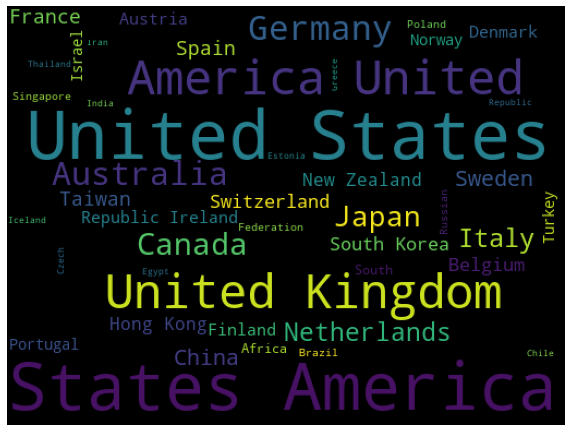

In [17]:
plt.subplots(figsize=(10,10))
cloud= WordCloud(background_color='black', width= 512, height= 384).generate(" ".join(x11))

plt.imshow(cloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()


# Box Plot
# Total Score and Research in 2015

In [18]:
trace= go.Box(y= x2015.total_score,
              name= 'total score of universities in 2015',
              marker=dict(color= 'rgba(16, 112, 2, 0.8)'))

traces= go.Box(y= x2015.research,
               name= 'research',
               marker= dict(color= 'rgb(12, 12, 140)'))

data= [trace, traces]
iplot(data)

# Scatter MatrixPlot
#Research, Total_Score, International In 2015

In [19]:
import plotly.figure_factory as ff

data2015 = x2015.loc[:,["research","international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)


fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

# 3D Scatter Plot
# World Rank, Citation, Research In 3D

In [20]:
trace= go.Scatter3d(x= x2015.world_rank,
                    y= x2015.citations,
                    z= x2015.research,
                    mode= 'markers',
                    marker=dict(size=10,color='rgb(255,0,0)'))
data= [trace]
layout= go.Layout(margin=dict(l=0, r=0, b=0, t=0))  
fig= go.Figure(data= data, layout= layout)
iplot(fig)

# Thank You For The Staying Power Indulged. Hope You Liked It??